In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

# Mouse

### Quake_10x_Liver

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,donor,free_annotation,gender,organ,organism,plate,platform,region
10X_P4_2_AAACCTGAGCTACCTA,hepatocyte,CL:0000182,hepatocyte,10.0,Quake_10x_Liver,3-M-8/9,midlobular male,M,Liver,Mus musculus,10X_P4_2,10x,hepatocytes
10X_P4_2_AAACCTGCAAGACACG,hepatocyte,CL:0000182,hepatocyte,12.0,Quake_10x_Liver,3-M-8/9,pericentral male,M,Liver,Mus musculus,10X_P4_2,10x,hepatocytes
10X_P4_2_AAACCTGCATGCCTTC,hepatocyte,CL:0000182,hepatocyte,9.0,Quake_10x_Liver,3-M-8/9,midlobular male,M,Liver,Mus musculus,10X_P4_2,10x,hepatocytes
10X_P4_2_AAACCTGGTATCTGCA,hepatocyte,CL:0000182,hepatocyte,3.0,Quake_10x_Liver,3-M-8/9,midlobular male,M,Liver,Mus musculus,10X_P4_2,10x,hepatocytes
10X_P4_2_AAACGGGTCCGCATAA,hepatocyte,CL:0000182,hepatocyte,3.0,Quake_10x_Liver,3-M-8/9,midlobular male,M,Liver,Mus musculus,10X_P4_2,10x,hepatocytes


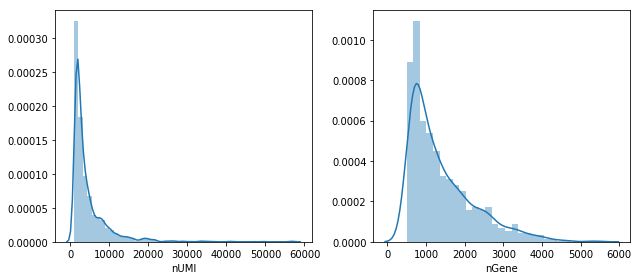

In [2]:
quake_10x_liver = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_10x_Liver/data.h5")
utils.peek(quake_10x_liver, "Quake_10x_Liver")
quake_10x_liver = quake_10x_liver.normalize()
quake_10x_liver.obs.head()

In [3]:
opt_model_kwargs = dict(batch_effect="donor", h_dim=32, batch_size=64)
quake_10x_liver_model = cb.directi.fit_DIRECTi(
    quake_10x_liver, quake_10x_liver.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_10x_Liver/model_0"
)
quake_10x_liver.latent = quake_10x_liver_model.inference(quake_10x_liver)

[DIRECTi epoch 0] train=3.487, val=3.628, time elapsed=1.2s Regular save...
[DIRECTi epoch 1] train=3.481, val=3.617, time elapsed=0.3s
[DIRECTi epoch 2] train=3.464, val=3.591, time elapsed=0.4s
[DIRECTi epoch 3] train=3.430, val=3.543, time elapsed=0.4s
[DIRECTi epoch 4] train=3.373, val=3.468, time elapsed=0.4s
[DIRECTi epoch 5] train=3.250, val=3.146, time elapsed=0.4s
[DIRECTi epoch 6] train=2.585, val=1.907, time elapsed=0.4s
[DIRECTi epoch 7] train=1.657, val=1.405, time elapsed=0.4s
[DIRECTi epoch 8] train=1.284, val=1.307, time elapsed=0.4s
[DIRECTi epoch 9] train=1.215, val=1.324, time elapsed=0.4s
[DIRECTi epoch 10] train=1.198, val=1.287, time elapsed=0.4s Regular save...
[DIRECTi epoch 11] train=1.188, val=1.726, time elapsed=0.4s
[DIRECTi epoch 12] train=1.190, val=1.610, time elapsed=0.4s
[DIRECTi epoch 13] train=1.188, val=1.423, time elapsed=0.4s
[DIRECTi epoch 14] train=1.184, val=1.804, time elapsed=0.4s
[DIRECTi epoch 15] train=1.182, val=1.585, time elapsed=0.4s
[D

[  Info   ] Computing tSNE...


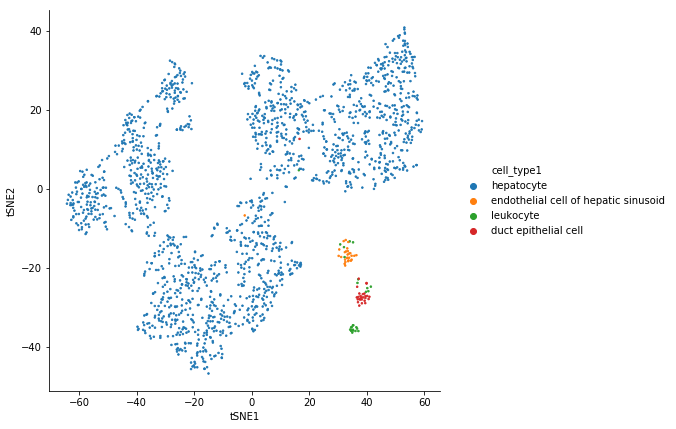

In [4]:
plot = quake_10x_liver.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_10x_Liver/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


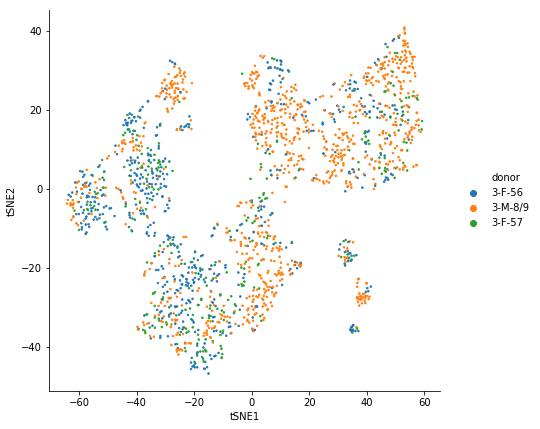

In [5]:
plot = quake_10x_liver.visualize_latent("donor")
plot.get_figure().savefig("Quake_10x_Liver/donor.pdf", bbox_inches="tight")

In [6]:
%%capture capio
quake_10x_liver_models = [quake_10x_liver_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_10x_liver_models.append(cb.directi.fit_DIRECTi(
        quake_10x_liver, quake_10x_liver.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_10x_Liver/model_%d" % i
    ))
quake_10x_liver_blast = cb.blast.BLAST(quake_10x_liver_models, quake_10x_liver, keep_exprs=True).build_empirical()
quake_10x_liver_blast.save("Quake_10x_Liver")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Liver/model_1/checkpoint-265
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Liver/model_2/checkpoint-146
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_10x_Liver/model_3/checkpoint-174


In [7]:
with open("Quake_10x_Liver/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_10x_Liver/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(quake_10x_liver_blast, "Quake_10x_Liver")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9447
Accuracy = 0.9989


## Mouse aligned

In [9]:
if not os.path.exists("ALIGNED_Mus_musculus_Liver"):
    os.makedirs("ALIGNED_Mus_musculus_Liver")
quake_smart_seq2_liver = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Liver/data.h5").normalize()
yang = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Yang/data.h5").normalize()
quake_10x_liver.obs["quake_10x_liver_donor"] = quake_10x_liver.obs["donor"]
quake_smart_seq2_liver.obs["quake_smart_seq2_liver_donor"] = quake_smart_seq2_liver.obs["donor"]
mouse = cb.data.ExprDataSet.merge_datasets(dict(
    quake_10x_liver=quake_10x_liver, quake_smart_seq2_liver=quake_smart_seq2_liver, yang=yang
), merge_uns_slots=["seurat_genes"])

[ Warning ] 19585 out of 42926 variables are not found, will be set to zero!
[ Warning ] 19585 out of 42926 variables are not found, will be set to zero!
[ Warning ] 2190 out of 42926 variables are not found, will be set to zero!
[  Info   ] Merging uns slots...
[  Info   ] Merging var data frame...
[  Info   ] Merging obs data frame...
[  Info   ] Merging expression matrix...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/Cell_BLAST/data.py:579: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_obs = pd.concat(merged_obs)


In [10]:
opt_model_kwargs = dict(
    batch_effect=["dataset_name", "quake_10x_liver_donor", "quake_smart_seq2_liver_donor"],
    rmbatch_module_kwargs=[dict(lambda_reg=0.005), dict(lambda_reg=0.01), dict(lambda_reg=0.01)],
    batch_size=64
)
mouse_model = cb.directi.fit_DIRECTi(
    mouse, mouse.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/mouse/model_0"
)
mouse.latent = mouse_model.inference(mouse)

[DIRECTi epoch 0] train=2.231, val=2.257, time elapsed=1.8s Regular save...
[DIRECTi epoch 1] train=2.223, val=2.241, time elapsed=0.9s
[DIRECTi epoch 2] train=2.193, val=2.185, time elapsed=0.9s
[DIRECTi epoch 3] train=1.636, val=3.014, time elapsed=0.9s
[DIRECTi epoch 4] train=0.895, val=1.357, time elapsed=0.8s
[DIRECTi epoch 5] train=0.861, val=1.040, time elapsed=0.9s
[DIRECTi epoch 6] train=0.838, val=0.839, time elapsed=0.8s
[DIRECTi epoch 7] train=0.812, val=0.840, time elapsed=0.8s
[DIRECTi epoch 8] train=0.799, val=0.809, time elapsed=0.8s
[DIRECTi epoch 9] train=0.790, val=0.819, time elapsed=0.8s
[DIRECTi epoch 10] train=0.782, val=0.789, time elapsed=0.9s Regular save...
[DIRECTi epoch 11] train=0.772, val=0.785, time elapsed=0.9s
[DIRECTi epoch 12] train=0.761, val=0.784, time elapsed=0.9s
[DIRECTi epoch 13] train=0.752, val=0.759, time elapsed=0.9s
[DIRECTi epoch 14] train=0.742, val=0.754, time elapsed=0.9s
[DIRECTi epoch 15] train=0.727, val=0.839, time elapsed=0.8s
[D

[  Info   ] Computing tSNE...


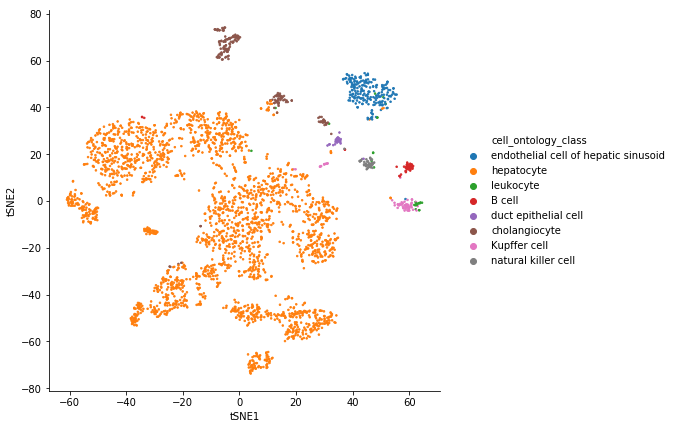

In [11]:
plot = mouse.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Liver/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


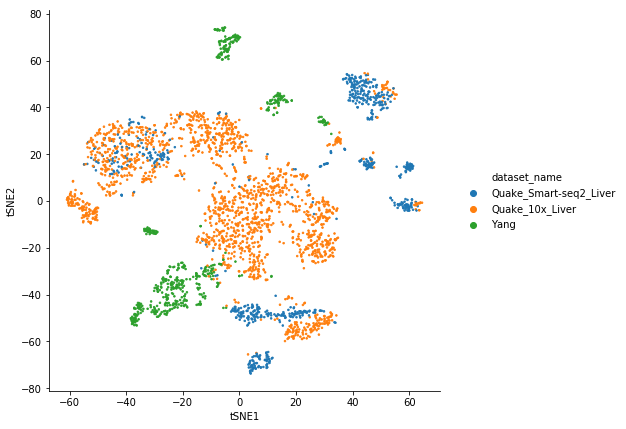

In [12]:
plot = mouse.visualize_latent("dataset_name")
plot.get_figure().savefig("ALIGNED_Mus_musculus_Liver/dataset_name.pdf", bbox_inches="tight")

In [13]:
%%capture capio
mouse_models = [mouse_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    mouse_models.append(cb.directi.fit_DIRECTi(
        mouse, mouse.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/ALIGNED_Mus_musculus_Liver/model_%d" % i
    ))
mouse_blast = cb.blast.BLAST(mouse_models, mouse, keep_exprs=True).build_empirical()
mouse_blast.save("ALIGNED_Mus_musculus_Liver")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Liver/model_1/checkpoint-102
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Liver/model_2/checkpoint-99
INFO:tensorflow:Restoring parameters from /tmp/cb/db/ALIGNED_Mus_musculus_Liver/model_3/checkpoint-113


In [14]:
with open("ALIGNED_Mus_musculus_Liver/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("ALIGNED_Mus_musculus_Liver/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [15]:
utils.self_projection(mouse_blast, "ALIGNED_Mus_musculus_Liver")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9177
Accuracy = 0.9954
